# Illustrations

``squishyplanet`` includes an illustration tool to help visualize the implications of different parameter choices. Below are a few examples of its output. See [OblateSystem.illustrate]([../oblate_system.html#oblate_system.OblateSystem.illustrate](https://squishyplanet.readthedocs.io/en/latest/oblate_system.html#oblate_system.OblateSystem.illustrate)) for more.



In [2]:
import jax

jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp
import matplotlib.pyplot as plt

from squishyplanet import OblateSystem

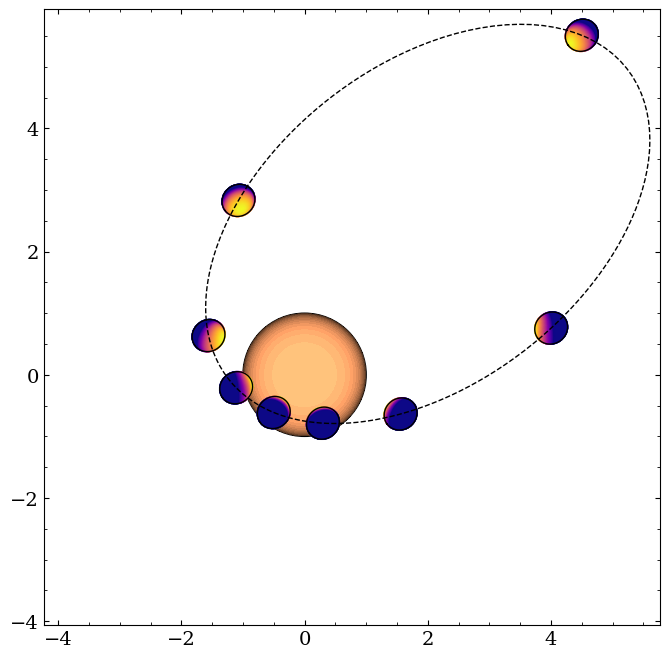

In [3]:
state = {
    "t_peri": 0.0,
    "times": jnp.linspace(0.0, 5, 400),
    "a": 5.0,
    "e":0.8,
    "omega":jnp.pi/3,
    "f1": 0.3,
    "f2" : 0.1,
    "obliq": -jnp.pi / 2,
    "prec": jnp.pi/4,
    "period": 10,
    "r": 0.3,
    "i": jnp.pi/4,
    "ld_u_coeffs": jnp.array([0.2, 0.65]),
    "tidally_locked": False,
}

system = OblateSystem(**state)

system.illustrate(
    true_anomalies=jnp.arange(0, 2 * jnp.pi, jnp.pi / 4),
    window_size=10.0,
    reflected=True,
)

## Emitted Light

To start, let's make a (comically large) spherical planet with a hotspot on the north pole:

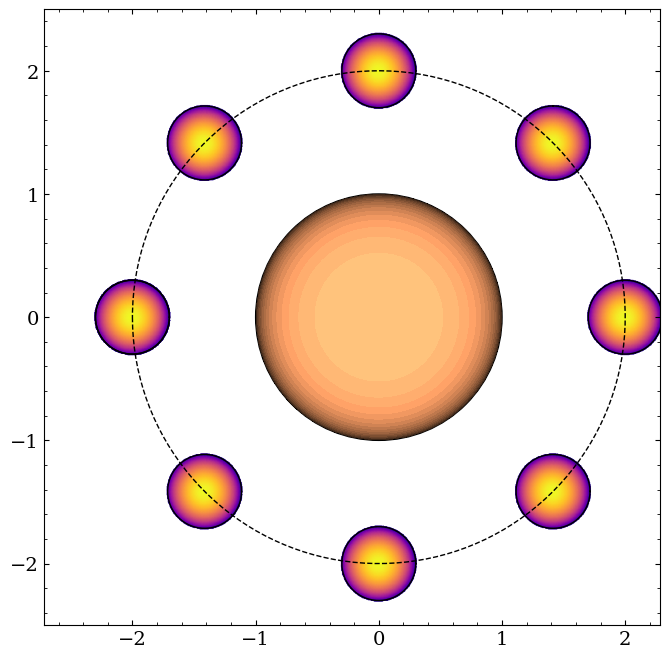

In [5]:
base = {
    "t_peri": 0.0,
    "times": jnp.linspace(0.0, 5, 400),
    "a": 2.0,
    "period": 10,
    "r": 0.3,
    "i": 0.0,
    "ld_u_coeffs": jnp.array([0.2, 0.65]),
}

state = {
    "hotspot_latitude": 0.0,
    "hotspot_longitude": 0.0,
    "hotspot_concentration": 1.0,
    "tidally_locked": True,
}

state = {**base, **state}

system = OblateSystem(**state)

system.illustrate(
    true_anomalies=jnp.linspace(0, 2 * jnp.pi, 9),
    window_size=5.0,
    emitted=True,
)

Now let's flatten it:

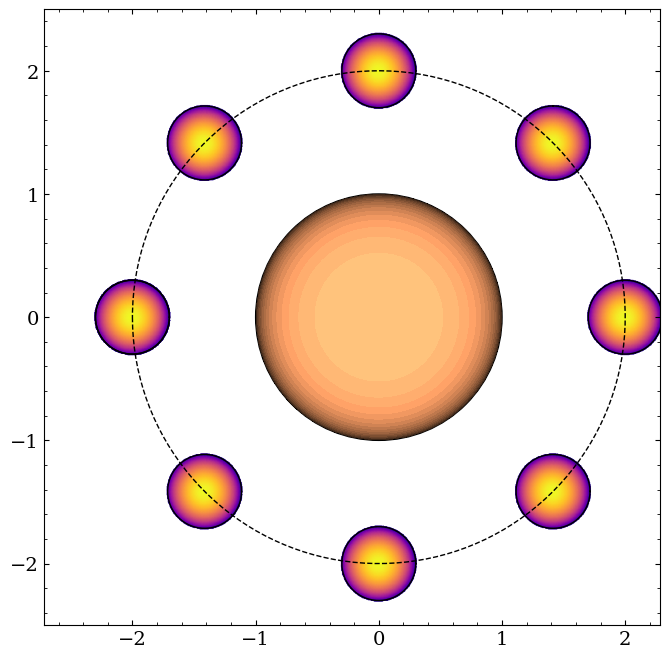

In [6]:
state = {
    "f1": 0.5,
    "hotspot_latitude": 0.0,
    "hotspot_longitude": 0.0,
    "hotspot_concentration": 1.0,
    "tidally_locked": True,
}

state = {**base, **state}

system = OblateSystem(**state)

system.illustrate(
    true_anomalies=jnp.linspace(0, 2 * jnp.pi, 9),
    window_size=5.0,
    emitted=True,
)

It looks like nothing happened: why? Because we flattened using `f1`, which compresses along the planet's polar axis. Since the north pole is still facing us, the projected area of the planet is unchanged. Now let's rotate it by adding some obliquity:

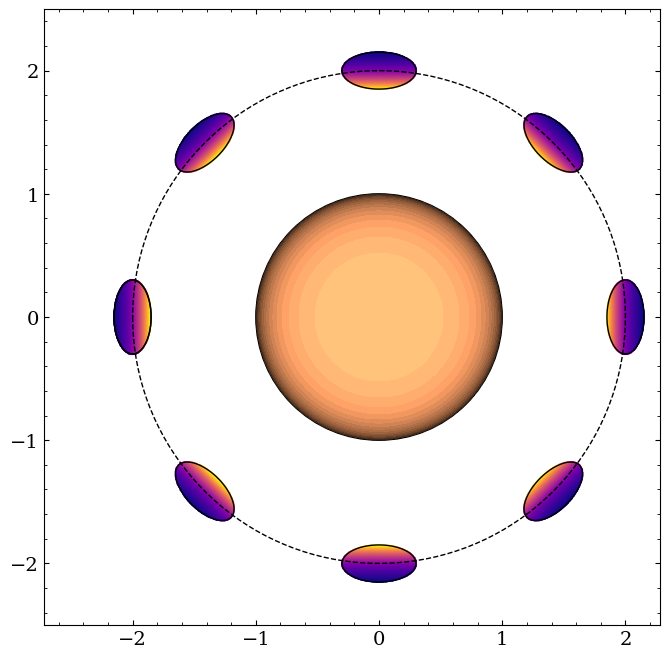

In [7]:
state = {
    "f1": 0.5,
    "obliq": -jnp.pi / 2,
    "hotspot_latitude": 0.0,
    "hotspot_longitude": 0.0,
    "hotspot_concentration": 1.0,
    "tidally_locked": True,
}

state = {**base, **state}

system = OblateSystem(**state)

system.illustrate(
    true_anomalies=jnp.linspace(0, 2 * jnp.pi, 9),
    window_size=5.0,
    emitted=True,
)

Now it's more clear that we've squished the planet. The north pole is no longer facing us, so the projected area of the planet is smaller.

Note that there are many potential degeneracies here. For example, we could compress along `f2` and keep the hotspot at the north pole, or compress along `f1`, rotate the planet 90 degrees, then place the hotspot on the equator:

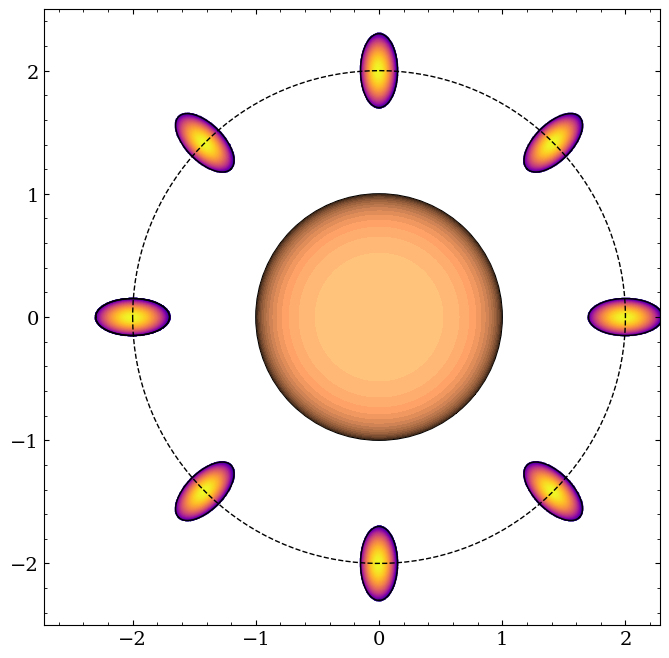

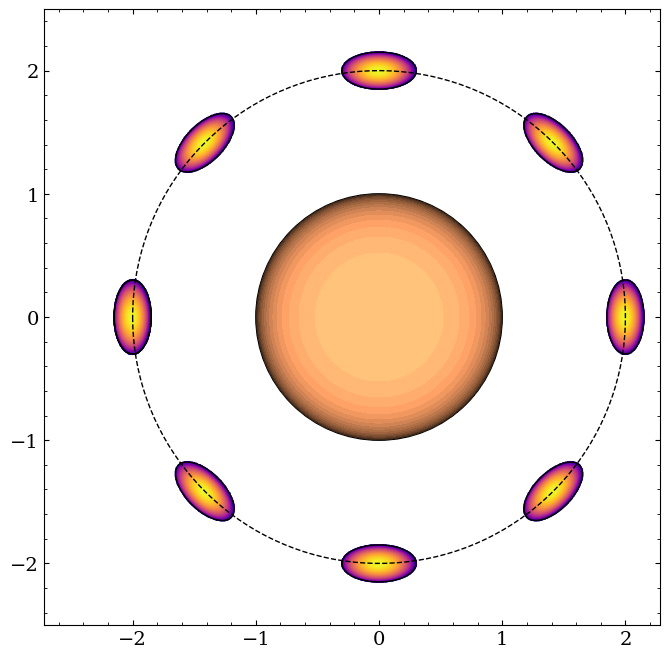

In [8]:
state = {
    "f2": 0.5,
    "hotspot_latitude": 0.0,
    "hotspot_longitude": 0.0,
    "hotspot_concentration": 1.0,
    "tidally_locked": True,
}

state = {**base, **state}

system = OblateSystem(**state)

system.illustrate(
    true_anomalies=jnp.linspace(0, 2 * jnp.pi, 9),
    window_size=5.0,
    emitted=True,
)

state = {
    "f1": 0.5,
    "obliq": -jnp.pi / 2,
    "hotspot_latitude": jnp.pi / 2,
    "hotspot_longitude": 0.0,
    "hotspot_concentration": 1.0,
    "tidally_locked": True,
}

state = {**base, **state}

system = OblateSystem(**state)

system.illustrate(
    true_anomalies=jnp.linspace(0, 2 * jnp.pi, 9),
    window_size=5.0,
    emitted=True,
)

These would create identical phase curves (actually these would both be boring/constant). In general, be careful about how you set up your priors to avoid these degeneracies.

Also, note the impact of setting ``tidally_locked`` to ``True``. Without this, the planet does not rotate about the axis parallel to z that runs through its center as it progresses on its orbit. The initial rotation of the planet about this (moving) axis is set by ``prec``, the "precession angle" of the planet. For example:

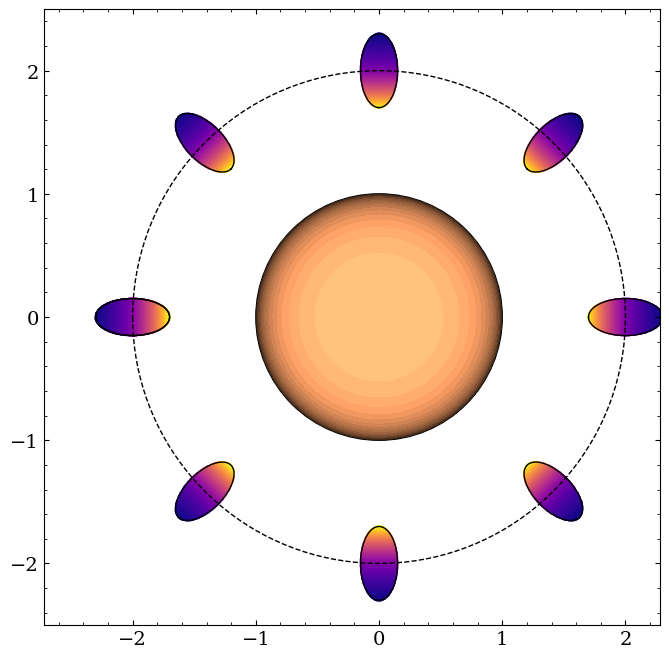

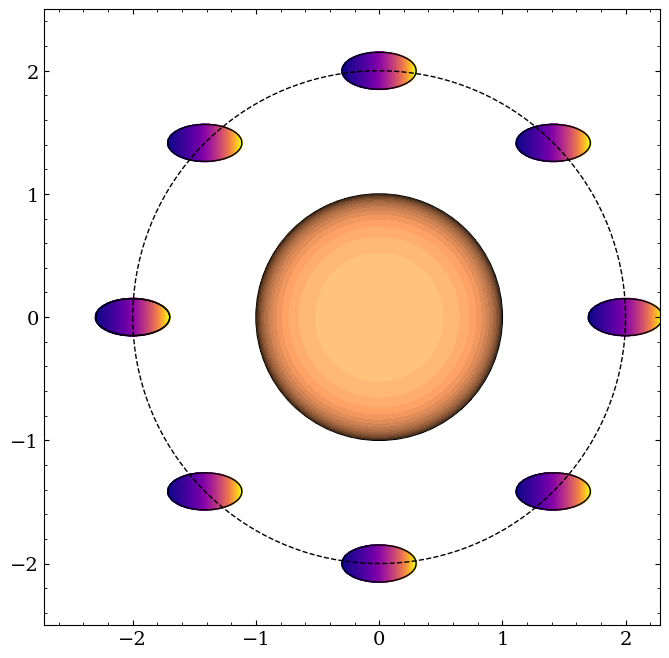

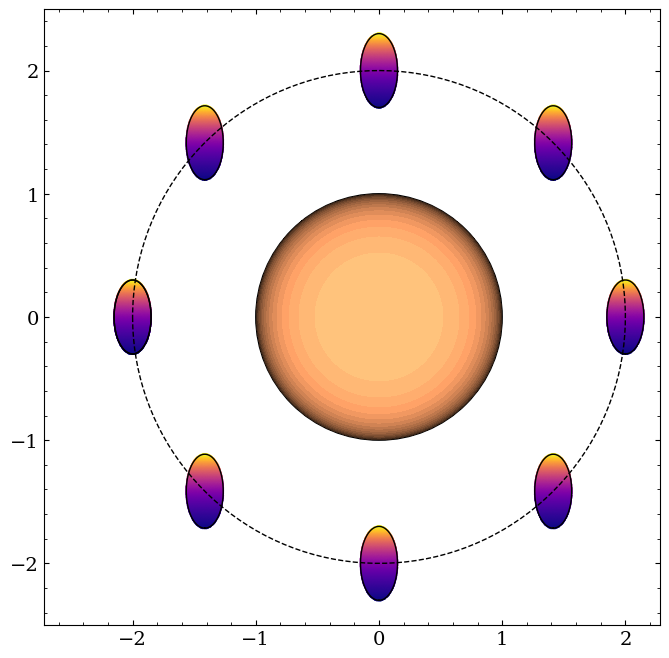

In [10]:
state = {
    "f2": 0.5,
    "obliq": -jnp.pi / 2,
    "hotspot_latitude": 0.0,
    "hotspot_longitude": 0.0,
    "hotspot_concentration": 1.0,
    "tidally_locked": True,
}

state = {**base, **state}
system = OblateSystem(**state)
system.illustrate(
    true_anomalies=jnp.linspace(0, 2 * jnp.pi, 9),
    window_size=5.0,
    emitted=True,
)

state["tidally_locked"] = False
system = OblateSystem(**state)
system.illustrate(
    true_anomalies=jnp.linspace(0, 2 * jnp.pi, 9),
    window_size=5.0,
    emitted=True,
)

state["prec"] = jnp.pi/2
system = OblateSystem(**state)
system.illustrate(
    true_anomalies=jnp.linspace(0, 2 * jnp.pi, 9),
    window_size=5.0,
    emitted=True,
)

## Reflected Light

That was all for emitted light, but we can visualize the reflected light too:

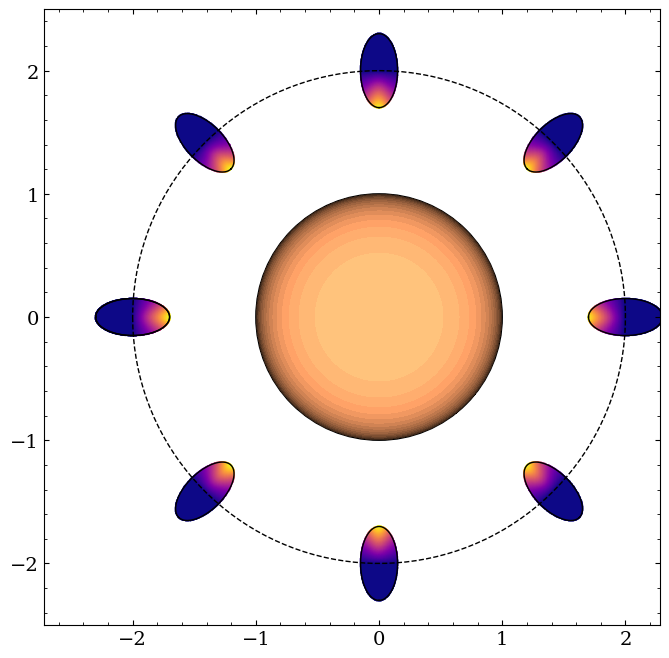

In [11]:
state = {
    "f2": 0.5,
    "obliq": -jnp.pi / 2,
    "tidally_locked": True,
}

state = {**base, **state}
system = OblateSystem(**state)

system.illustrate(
    true_anomalies=jnp.linspace(0, 2 * jnp.pi, 9),
    window_size=5.0,
    reflected=True,
)

Note how as we increase the inclination, the projected area of a tidally locked planet changes over the course of the orbit:

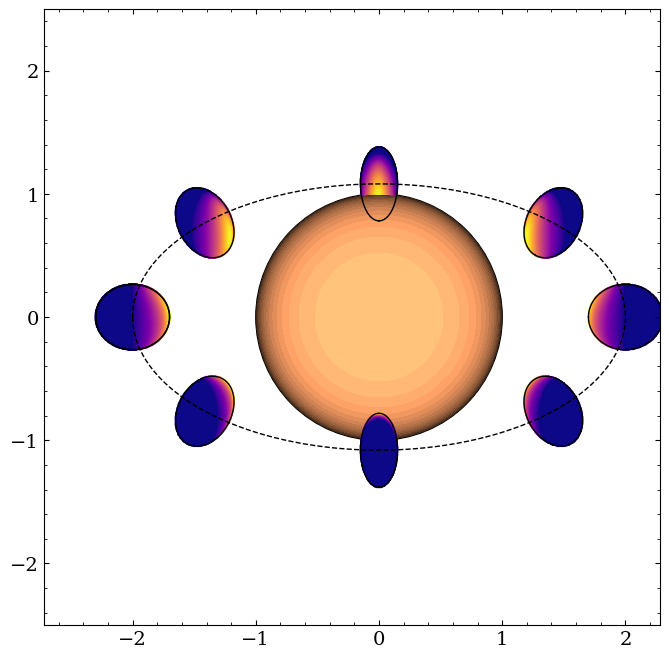

In [13]:
state = {
    "f2": 0.5,
    "obliq": -jnp.pi / 2,
    "tidally_locked": True,
}

state = {**base, **state}
state["i"] = 1.0
system = OblateSystem(**state)

system.illustrate(
    true_anomalies=jnp.linspace(0, 2 * jnp.pi, 9),
    window_size=5.0,
    reflected=True,
)

## Limb darkening profile check

The only other method in ``OblateSystem`` besides ``lightcurve``, ``loglike``, and ``illustrate`` is ``limb_darkening_profile``. This is included to help visualize the limb darkening profile which is maybe helpful when using higher-order polynomials.

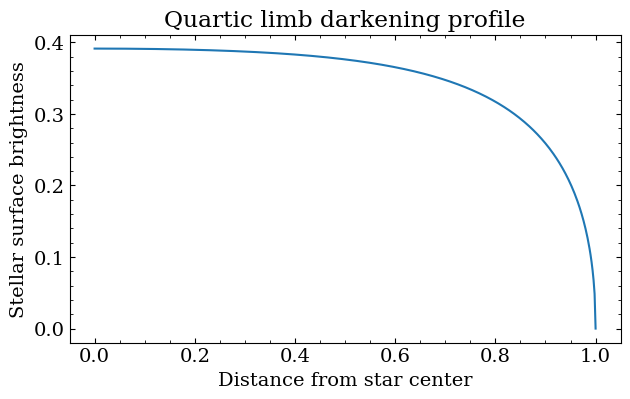

In [10]:
state = {
    "t_peri": 0.0,
    "times": jnp.linspace(0.0, 5, 10),
    "a": 2.0,
    "period": 10,
    "r": 0.1,
    "ld_u_coeffs": jnp.array([0.2, 0.65, 0.05, 0.1]),
}

system = OblateSystem(**state)

radii = jnp.linspace(0, 1, 500)
ld_profile = system.limb_darkening_profile(radii)

fig, ax = plt.subplots()
ax.plot(radii, ld_profile)
ax.set(
    xlabel="Distance from star center",
    ylabel="Stellar surface brightness",
    title="Quartic limb darkening profile",
);